# Lab Assignment Five: Wide and Deep Network Architectures
In this lab, you will select a prediction task to perform on your dataset, evaluate two different deep learning architectures and tune hyper-parameters for each architecture. If any part of the assignment is not clear, ask the instructor to clarify. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

## Dataset Selection

Select a dataset similarly to lab one. That is, the dataset must be table data and must have categorical features. In terms of generalization performance, it is helpful to have a large dataset for building a wide and deep network. It is also helpful to have many different categorical features to create the embeddings and cross-product embeddings. It is fine to perform binary classification, multi-class classification, or regression. You are NOT allowed to use the census (i.e., Adult) dataset that was given as an example in class. 

we have selected this dataset: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data



## Grading Rubric

### Preparation (4 points total)
- [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required. 

- [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 

- [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

- [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 


In [145]:
import pandas as pd

df = pd.read_csv('car_prices.csv')
headers = df.columns
# df = df.head(100000)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB
None


[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.

We first decide to drop anything that has missing values rather than try to impute new values, since there is still plenty of data and the points of this lab is not data cleaning.

In [146]:
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB
None


In [147]:
#other years have limited entries, so we will focus on 2005-2014
from tensorflow.keras.metrics import AUC

df = df[df['year'] >= 2005]
df = df[df['year'] < 2015]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 417707 entries, 2 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          417707 non-null  int64  
 1   make          417707 non-null  object 
 2   model         417707 non-null  object 
 3   trim          417707 non-null  object 
 4   body          417707 non-null  object 
 5   transmission  417707 non-null  object 
 6   vin           417707 non-null  object 
 7   state         417707 non-null  object 
 8   condition     417707 non-null  float64
 9   odometer      417707 non-null  float64
 10  color         417707 non-null  object 
 11  interior      417707 non-null  object 
 12  seller        417707 non-null  object 
 13  mmr           417707 non-null  float64
 14  sellingprice  417707 non-null  float64
 15  saledate      417707 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 54.2+ MB
None


In [148]:
df['year'].value_counts()


year
2013    87467
2012    87380
2014    69712
2011    41384
2008    27011
2007    25378
2010    22616
2006    21631
2009    17959
2005    17169
Name: count, dtype: int64

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.

Now, we convert the selling price column into two intervals so that we can binary predict it.

In [149]:
import pandas as pd

# Define the intervals for the selling price column
intervals = [0,12500, float('inf')]

# Create a new column with the interval labels
df['price_interval'] = pd.cut(df['sellingprice'], bins=intervals)

# Count the number of entries in each interval
interval_counts = df['price_interval'].value_counts()

# Print the number of entries in each interval
print(interval_counts)


price_interval
(12500.0, inf]    219069
(0.0, 12500.0]    198638
Name: count, dtype: int64


We notice below that there is a lot of categorical data with many different types, so we need to reduce that first.

In [150]:
unique_trim = df['trim'].unique()
print(unique_trim)

['328i SULEV' '650i' 'Base' ... 'pure' 'EWB' 'Power Wagon']


In [151]:
unique_model = df['model'].unique()
print(unique_model)

['3 Series' '6 Series Gran Coupe' 'M5' 'Cruze' 'A4' 'Camaro' 'A6' 'Q5'
 '6 Series' '5 Series' 'SQ5' 'S5' 'ELR' 'X6' 'ILX' 'A8' 'X1' 'Enclave'
 'TTS' '4 Series' 'MDX' 'Silverado 1500' 'SRX' 'X5' 'G Coupe' 'G Sedan'
 'FX' 'Santa Fe' 'Genesis' 'Equus' 'Elantra' 'Sonata' 'Sonata Hybrid'
 'Accent' 'Veloster' 'Elantra Coupe' 'Azera' 'Tucson' 'Genesis Coupe'
 'Wrangler' 'Optima' 'Altima' 'S-Class' 'GS 350' 'Outlander' 'C-Class'
 'Mazda2' 'Rio' 'M' '370Z' 'Soul' 'Sorento' 'Outlander Sport' 'SLK-Class'
 'ES 350' 'E-Class' 'Mazda3' 'Cooper Clubman' 'Cooper' 'CX-9' 'Forte'
 'Compass' 'JX' 'LR4' 'Mazda5' 'Range Rover Evoque' 'LS 460' 'GLK-Class'
 'Sportage' 'Grand Cherokee' 'MKX' 'XF' 'GL-Class' 'M-Class'
 'Cooper Countryman' 'RX 350' 'Lancer' 'Range Rover Sport' 'Passat'
 'Corolla' 'XC60' 'Sienna' 'Juke' 'Yaris' 'NV' 'CC' 'Leaf' 'Camry'
 'Tacoma' 'Jetta' 'Impreza WRX' 'FJ Cruiser' 'Beetle' 'Avalon' 'FR-S'
 'NV200' 'Rogue' 'Tundra' 'Maxima' 'Cayenne' '911' 'Xterra' 'Versa'
 'Sentra' 'Prius' 'S80' 

In [152]:
unique_makes = df['body'].unique()
print(unique_makes)
len(unique_makes)

['Sedan' 'Convertible' 'SUV' 'Coupe' 'Crew Cab' 'G Coupe' 'G Sedan'
 'Hatchback' 'Elantra Coupe' 'Genesis Coupe' 'Wagon' 'Minivan' 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'CTS Coupe'
 'SuperCrew' 'E-Series Van' 'Extended Cab' 'SuperCab' 'G Convertible'
 'Koup' 'Regular Cab' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Q60 Convertible' 'CTS Wagon' 'G37 Coupe' 'Mega Cab'
 'Cab Plus 4' 'Q60 Coupe' 'Beetle Convertible' 'TSX Sport Wagon'
 'Promaster Cargo Van' 'GranTurismo Convertible' 'CTS-V Wagon'
 'convertible' 'minivan' 'van' 'regular-cab' 'suv' 'g sedan' 'g coupe'
 'hatchback' 'king cab' 'supercrew' 'g convertible' 'coupe' 'crew cab'
 'wagon' 'e-series van' 'regular cab' 'quad cab' 'g37 convertible'
 'supercab' 'extended cab' 'crewmax cab' 'double cab' 'genesis coupe'
 'access cab' 'mega cab' 'beetle convertible' 'cts coupe' 'koup'
 'club cab' 'elantra coupe' 'cts-v coupe' 'granturismo convertible'
 'tsx sport wagon' 'promaster cargo van' 'q60 conve

79

Here, we convert the body field to have less options.

In [153]:
df['body'] = df['body'].str.lower()
replacements = {
    'convertible': 'convertible',
    'coupe|koup': 'coupe',
    'cab|crew': 'cab',
    'van': 'van',
    'wagon': 'wagon',
    'sedan': 'sedan'
}

for key, value in replacements.items():
    df.loc[df['body'].str.contains(key, case=False), 'body'] = value

In [154]:
unique_makes = df['body'].unique()
print(unique_makes)
df['body'].value_counts()

['sedan' 'convertible' 'suv' 'coupe' 'cab' 'hatchback' 'wagon' 'van']


body
sedan          195081
suv            105395
cab             35395
van             24024
hatchback       22121
coupe           15177
wagon           12756
convertible      7758
Name: count, dtype: int64

In [155]:
# should we use string for ordinal data? or should we use integers?

ranges = [(0, 11, 'poor'), (11, 21, 'not good'), (21, 31, 'fair'), (31, 41, 'good'), (41, 51, 'great')]

for start, end, label in ranges:
    df['condition'] = df['condition'].replace(range(start, end), label)


In [156]:
df.drop('mmr', axis=1, inplace=True)

Basically, we cleaned the dataset of any non-full rows and we also reduced the amount of categorical data there was. The final data is described above. 

We decided to simply do a train-test split because of the large size of our data (417707). Simple train-test split is very effective for computational efficiency, and since we are working on laptops we don't have the power to do k-fold or stratified k-fold in a reasonable amount of time. In the real world, with more powerful machines, it would be better to use these methods, but that is not the main aim of this project. Additionally, since we have a large dataset, a simple split still gives a reliable estimate of the model's performance. Finally, this could mirror the realistic scenario where availiable data is used to train and then make predictions on a large amount of new, unforseen data, which is exactly what the train-test split does. Although other methods do give us slightly better estimates, it is out of the scope of our computing power.

In [157]:
from sklearn.model_selection import train_test_split

df_train_orig, df_test_orig = train_test_split(df, test_size=0.2, random_state=37)

In [158]:
from copy import deepcopy
df_train = deepcopy(df_train_orig)
df_test = deepcopy(df_test_orig)

In [159]:
import numpy as np

df_train.reset_index()
df_test.reset_index()

df_test.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,price_interval
387952,2008,Jeep,Liberty,Sport,suv,automatic,1j8gn28k18w195884,oh,great,126044.0,red,gray,tc's used cars llc,7800.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST),"(0.0, 12500.0]"
369170,2014,Lincoln,MKX,Base,suv,automatic,2lmdj8jk4ebl06749,tn,great,10077.0,—,beige,ford motor credit company,34000.0,Thu Mar 05 2015 03:00:00 GMT-0800 (PST),"(12500.0, inf]"
165759,2007,GMC,Yukon,SLE,suv,automatic,1gkfk13047r312578,md,great,90057.0,blue,beige,lexus of rockville,15400.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),"(12500.0, inf]"
113164,2012,Toyota,Prius c,Two,hatchback,automatic,jtdkdtb34c1509187,pa,fair,54808.0,black,gray,ken pollock nissan llc,9000.0,Fri Jan 16 2015 01:00:00 GMT-0800 (PST),"(0.0, 12500.0]"
75538,2011,GMC,Yukon,SLT,suv,automatic,1gks1ce05br150916,ca,poor,61831.0,black,black,rvr,24500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST),"(12500.0, inf]"


In [160]:
#encode the label of target as an integer
from sklearn.preprocessing import LabelEncoder
tmp = LabelEncoder()
df_train.price_interval = tmp.fit_transform(df_train.price_interval)
df_test.price_interval = tmp.transform(df_test.price_interval)

In [161]:
# define variables that should be encoded as integers   
encoders = dict() # save each encoder in dictionary
categorical_headers = ['make','model','body','transmission',
                       'color','interior','state','trim','condition']

# get unique values in each feature
for col in categorical_headers:
    print(f'{col} has {len(df_train[col].unique())} unique values.')
    

# ========================================================
# define variables that should be scaled or made discrete
numeric_headers = ['odometer','year']
df_train[numeric_headers] = df_train[numeric_headers].to_numpy().astype(float)
df_test[numeric_headers] = df_test[numeric_headers].to_numpy().astype(float)
    
df_test.head()

make has 49 unique values.
model has 604 unique values.
body has 8 unique values.
transmission has 2 unique values.
color has 20 unique values.
interior has 17 unique values.
state has 34 unique values.
trim has 1124 unique values.
condition has 5 unique values.


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate,price_interval
387952,2008.0,Jeep,Liberty,Sport,suv,automatic,1j8gn28k18w195884,oh,great,126044.0,red,gray,tc's used cars llc,7800.0,Tue Mar 03 2015 01:30:00 GMT-0800 (PST),0
369170,2014.0,Lincoln,MKX,Base,suv,automatic,2lmdj8jk4ebl06749,tn,great,10077.0,—,beige,ford motor credit company,34000.0,Thu Mar 05 2015 03:00:00 GMT-0800 (PST),1
165759,2007.0,GMC,Yukon,SLE,suv,automatic,1gkfk13047r312578,md,great,90057.0,blue,beige,lexus of rockville,15400.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST),1
113164,2012.0,Toyota,Prius c,Two,hatchback,automatic,jtdkdtb34c1509187,pa,fair,54808.0,black,gray,ken pollock nissan llc,9000.0,Fri Jan 16 2015 01:00:00 GMT-0800 (PST),0
75538,2011.0,GMC,Yukon,SLT,suv,automatic,1gks1ce05br150916,ca,poor,61831.0,black,black,rvr,24500.0,Wed Dec 31 2014 12:30:00 GMT-0800 (PST),1


In [162]:
print(df_train['sellingprice'].unique())
print(df_train['odometer'].unique())
condition_unique = df_train['sellingprice'].nunique()
odometer_unique = df_train['odometer'].nunique()

print(f"Number of unique values in 'sellingprice': {condition_unique}")
print(f"Number of unique values in 'odometer': {odometer_unique}")


[ 3600. 10400. 37800. ... 57700. 19380. 59900.]
[101930.  42210.   7176. ...  80082.  86425. 107224.]
Number of unique values in 'sellingprice': 1642
Number of unique values in 'odometer': 128756


In [163]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import sys
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
print(tf.__version__)
print(sys.version)

2.16.1
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [164]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [165]:
# create a tensorflow dataset, for ease of use later
batch_size = 64

def create_dataset_from_dataframe(df_input):

    df = df_input.copy()
    labels = df['price_interval']

    df = {key: value.values[:,np.newaxis] for key, value in df_input[categorical_headers+numeric_headers].items()}

    # create the Dataset here
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    
    # now enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    
    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

In [166]:
# here is an example of what the data looks like from this class
[(feat,label)] = ds_train.take(1)
print('The keys in the feature data are:')
print(feat.keys())
print('\nThe feature shape for age is:')
print('Shape:',feat['year'].shape)
print('Max:',max(feat['year']))
print('\nThe labels for this batch are:')
print(label) # print one batch of the labels 

The keys in the feature data are:
dict_keys(['make', 'model', 'body', 'transmission', 'color', 'interior', 'state', 'trim', 'condition', 'odometer', 'year'])

The feature shape for age is:
Shape: (64, 1)
Max: tf.Tensor([2014.], shape=(1,), dtype=float64)

The labels for this batch are:
tf.Tensor(
[0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0], shape=(64,), dtype=int32)


In [167]:
# setup the naive example with the numeric data, only


# setup different inputs manually  
# each of these will be expected from the tf.data input
all_branch_inputs = []
for feat_name in numeric_headers:
    # the model expects each input to be named 'feat_name'
    tmp = Input(shape=(1,), dtype="float32", name=feat_name)
    all_branch_inputs.append(tmp)
    
# now concatenate all the inputs together into one big vector
x = Concatenate(name='concat_1')(all_branch_inputs)

x = Dense(16, activation="relu")(x)
x = Dense(8, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

# no need to compile this, change the process to use Gradient tape
training_model = keras.Model(inputs=all_branch_inputs, 
                             outputs=predictions)


training_model.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_1            │ (None, 2)         │          0 │ odometer[0][0],   │
│ (Concatenate)       │                   │            │ year[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │         48 │ concat_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 8)         │        136 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │          9 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

Below, you will notice that we show a variety of evaluation metrics (accuracy, precision, recall, and area under the curve). These all support different business contexts. The most balanced one, that we choose to look at the most, is hte area under the curve, which tells us our model's ability to distinguish between the classes. Another good one is precision, since it weights more the true positives vs false positives. If we care more about falsely identifying a car, which could lead to overpricing cars and therefore lost money, we would look more at precision. If we care more about recall, which cares about true negatives vs false negatives, which could lead to underpricing cars and therefore lost money, we would use Recall. In our evaluations, we believe that auc is the most important since it is more balanced, then recall, then precision. This is because we believe it is better to overprice than under price cars, since if you overprice you can always go back and then underprice them, while underpricing cars does not leave you with inventory.

<!-- ### This is the model with no wide part of the network, just the deep part -->

In [176]:
#there was a stupid idiot retarded error so i had to find what was causing it

def find_feature_with_value(dataset, value):
    for batch in dataset:
        features, _ = batch
        for feature_name, feature_values in features.items():
            if feature_values.dtype == tf.string:
                value_to_find = tf.constant(value, dtype=tf.string)
            elif feature_values.dtype == tf.float64:
                value_to_find = tf.constant(float(value), dtype=tf.float64)
            else:
                value_to_find = tf.constant(float(value), dtype=tf.float32)
            if tf.reduce_any(tf.equal(feature_values, value_to_find)):
                return feature_name
    return None

value_to_find = "3.5"
feature_name = find_feature_with_value(ds_test, value_to_find)

if feature_name is None:
    print(f"No feature found with value {value_to_find}")
else:
    print(f"Feature '{feature_name}' has value {value_to_find}")

Feature 'trim' has value 3.5


In [179]:
# can also run evaluation, batch by batch and aggregate the results
inference_model.evaluate(ds_test)

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.9324 - Recall: 0.9544 - accuracy: 0.9403 - auc: 0.9876 - loss: 0.1417


[0.14037705957889557,
 0.9421967267990112,
 0.9351438283920288,
 0.9560472369194031,
 0.9877901077270508]

In [180]:
from tensorflow.keras.layers import Embedding, Flatten

def setup_embedding_from_categorical(feature_space, col_name):
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = len(feature_space.preprocessors[col_name].get_vocabulary())
    
    # get the output from the feature space, which is input to embedding
    x = feature_space.preprocessors[col_name].output
    
    # now use an embedding to deal with integers from feature space
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)),
                   name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x # return the tensor here 

In [181]:
from tensorflow.keras.layers import Layer
class CastToFloat(Layer):
    def call(self, inputs):
        return tf.cast(inputs, tf.float32)

## crossed columns


In [184]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2),
        FeatureSpace.cross(
            feature_names=('interior','color'), # 14 x 16
            crossing_dim=17*20),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)

In [185]:
def setup_embedding_from_crossing(feature_space, col_name):
    # what the maximum integer value for this variable?
    
    # get the size of the feature
    N = feature_space.crossers[col_name].num_bins
    x = feature_space.crossers[col_name].output
    
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  name=col_name+'_embed')(x)
    
    x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
    return x

[2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.

This is our first model, using three dense layers.

In [186]:
dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

training_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model.summary()



Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 72,753 (284.20 KB)

 Trainable params: 72,747 (284.17 KB)

 Non-trainable params: 6 (32.00 B)

In [187]:
# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

In [188]:
history = training_model.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 13s - 3ms/step - Precision: 0.9318 - Recall: 0.9361 - accuracy: 0.9306 - auc: 0.9825 - loss: 0.1684 - val_Precision: 0.9306 - val_Recall: 0.9509 - val_accuracy: 0.9370 - val_auc: 0.9860 - val_loss: 0.1510
Epoch 2/5
5222/5222 - 9s - 2ms/step - Precision: 0.9401 - Recall: 0.9455 - accuracy: 0.9398 - auc: 0.9871 - loss: 0.1442 - val_Precision: 0.9346 - val_Recall: 0.9515 - val_accuracy: 0.9397 - val_auc: 0.9869 - val_loss: 0.1459
Epoch 3/5
5222/5222 - 9s - 2ms/step - Precision: 0.9426 - Recall: 0.9475 - accuracy: 0.9422 - auc: 0.9880 - loss: 0.1383 - val_Precision: 0.9367 - val_Recall: 0.9510 - val_accuracy: 0.9406 - val_auc: 0.9872 - val_loss: 0.1432
Epoch 4/5
5222/5222 - 9s - 2ms/step - Precision: 0.9440 - Recall: 0.9492 - accuracy: 0.9438 - auc: 0.9886 - loss: 0.1347 - val_Precision: 0.9374 - val_Recall: 0.9517 - val_accuracy: 0.9414 - val_auc: 0.9875 - val_loss: 0.1418
Epoch 5/5
5222/5222 - 9s - 2ms/step - Precision: 0.9450 - Recall: 0.9502 - accuracy: 0.9449 - a

Text(0.5, 0, 'epochs')

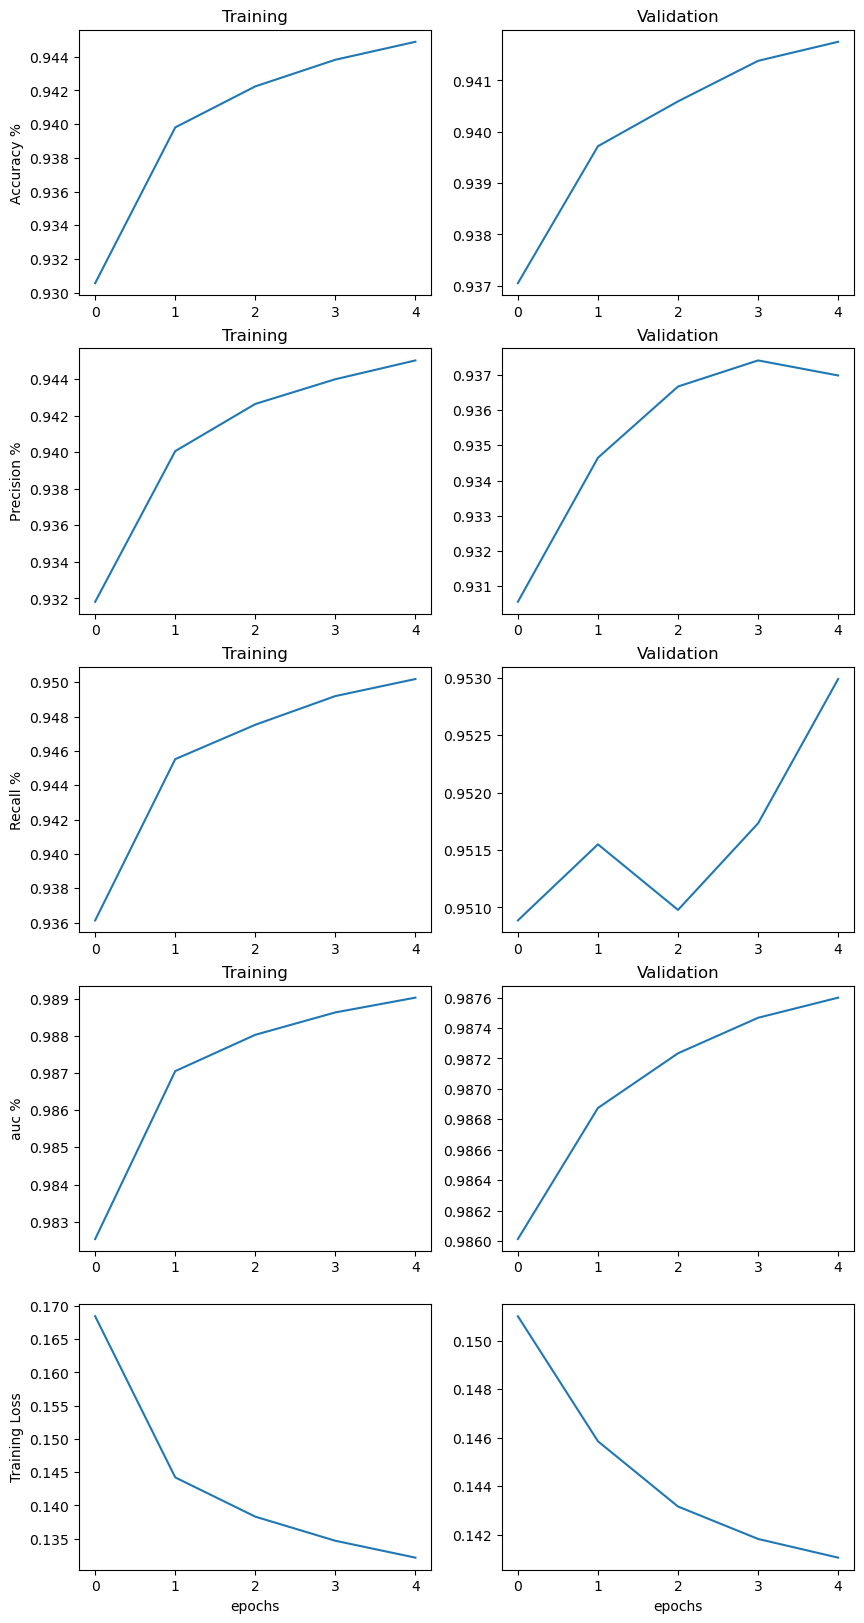

In [189]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,20))

plt.subplot(5,2,1)
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy %')
plt.title('Training')

plt.subplot(5,2,2)
plt.plot(history.history['val_accuracy'])
plt.title('Validation')


plt.subplot(5,2,3)
plt.plot(history.history['Precision'])
plt.ylabel('Precision %')
plt.title('Training')

plt.subplot(5,2,4)
plt.plot(history.history['val_Precision'])
plt.title('Validation')


plt.subplot(5,2,5)
plt.plot(history.history['Recall'])
plt.ylabel('Recall %')
plt.title('Training')

plt.subplot(5,2,6)
plt.plot(history.history['val_Recall'])
plt.title('Validation')


plt.subplot(5,2,7)
plt.plot(history.history['auc'])
plt.ylabel('auc %')
plt.title('Training')

plt.subplot(5,2,8)
plt.plot(history.history['val_auc'])
plt.title('Validation')


plt.subplot(5,2,9)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(5,2,10)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')


#precision, recall, auc

In [190]:
# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

[2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.

This is our second model, using two dense layers instead of three like last time.

In [191]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space2 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','model'), # dims: 7 x 14 = 
            crossing_dim=5*604),
        FeatureSpace.cross(
            feature_names=('trim','transmission',), # 7 x 2 x 5
            crossing_dim=1124*2),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels2 = ds_train.map(lambda x, _: x)
feature_space2.adapt(train_ds_with_no_labels2)

In [192]:
dict_inputs2 = feature_space2.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs2 = []

# for each crossed variable, make an embedding
for col in feature_space2.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space2, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs2.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch2 = Concatenate(name='wide_concat2')(crossed_outputs2)

# reset this input branch
all_deep_branch_outputs2 = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space2.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs2.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space2, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs2.append(x)


# merge the deep branches together
deep_branch2 = Concatenate(name='embed_concat')(all_deep_branch_outputs2)
deep_branch2 = Dense(units=100,activation='relu', name='deep1')(deep_branch2)
deep_branch2 = Dense(units=10,activation='relu', name='deep3')(deep_branch2)
    
# merge the deep and wide branch
final_branch2 = Concatenate(name='concat_deep_wide2')([deep_branch2, wide_branch2])
final_branch2 = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch2)

training_model2 = keras.Model(inputs=dict_inputs2, outputs=final_branch2)
training_model2.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model2.summary()


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 335,519 (1.28 MB)

 Trainable params: 335,513 (1.28 MB)

 Non-trainable params: 6 (32.00 B)

In [193]:
# plot_model(
#     training_model2, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

In [194]:
history2 = training_model2.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 22s - 4ms/step - Precision: 0.9320 - Recall: 0.9342 - accuracy: 0.9297 - auc: 0.9820 - loss: 0.1709 - val_Precision: 0.9294 - val_Recall: 0.9515 - val_accuracy: 0.9367 - val_auc: 0.9856 - val_loss: 0.1530
Epoch 2/5
5222/5222 - 16s - 3ms/step - Precision: 0.9383 - Recall: 0.9454 - accuracy: 0.9388 - auc: 0.9867 - loss: 0.1464 - val_Precision: 0.9339 - val_Recall: 0.9512 - val_accuracy: 0.9392 - val_auc: 0.9866 - val_loss: 0.1467
Epoch 3/5
5222/5222 - 16s - 3ms/step - Precision: 0.9413 - Recall: 0.9481 - accuracy: 0.9418 - auc: 0.9878 - loss: 0.1399 - val_Precision: 0.9372 - val_Recall: 0.9504 - val_accuracy: 0.9406 - val_auc: 0.9872 - val_loss: 0.1432
Epoch 4/5
5222/5222 - 14s - 3ms/step - Precision: 0.9433 - Recall: 0.9495 - accuracy: 0.9435 - auc: 0.9885 - loss: 0.1357 - val_Precision: 0.9385 - val_Recall: 0.9513 - val_accuracy: 0.9417 - val_auc: 0.9874 - val_loss: 0.1417
Epoch 5/5
5222/5222 - 12s - 2ms/step - Precision: 0.9445 - Recall: 0.9508 - accuracy: 0.9449

Text(0.5, 0, 'epochs')

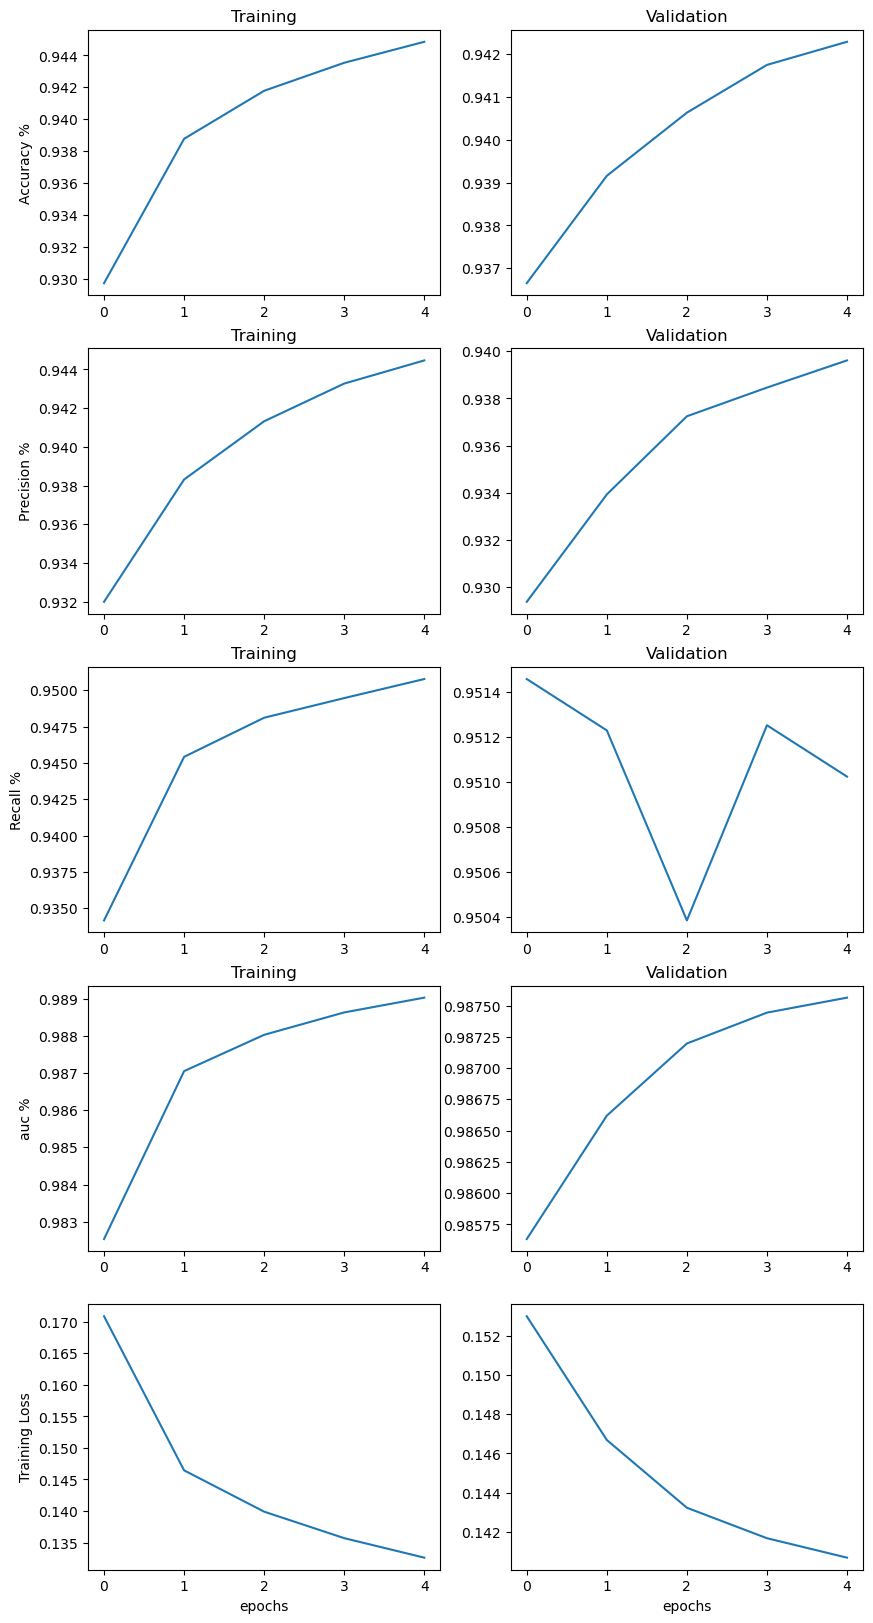

In [195]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,20))

plt.subplot(5,2,1)
plt.plot(history2.history['accuracy'])
plt.ylabel('Accuracy %')
plt.title('Training')

plt.subplot(5,2,2)
plt.plot(history2.history['val_accuracy'])
plt.title('Validation')


plt.subplot(5,2,3)
plt.plot(history2.history['Precision'])
plt.ylabel('Precision %')
plt.title('Training')

plt.subplot(5,2,4)
plt.plot(history2.history['val_Precision'])
plt.title('Validation')


plt.subplot(5,2,5)
plt.plot(history2.history['Recall'])
plt.ylabel('Recall %')
plt.title('Training')

plt.subplot(5,2,6)
plt.plot(history2.history['val_Recall'])
plt.title('Validation')


plt.subplot(5,2,7)
plt.plot(history.history['auc'])
plt.ylabel('auc %')
plt.title('Training')

plt.subplot(5,2,8)
plt.plot(history2.history['val_auc'])
plt.title('Validation')


plt.subplot(5,2,9)
plt.plot(history2.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(5,2,10)
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')


#precision, recall, auc

[2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.

This is our third model, using four dense layers instead of three or two like the last two.

In [197]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space3 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels3 = ds_train.map(lambda x, _: x)
feature_space3.adapt(train_ds_with_no_labels3)

In [198]:
dict_inputs3 = feature_space3.get_inputs() # need to use unprocessed features here, to gain access to each output

# we need to create separate lists for each branch
crossed_outputs3 = []

# for each crossed variable, make an embedding
for col in feature_space3.crossers.keys():
    
    x = setup_embedding_from_crossing(feature_space3, col)
    
    # save these outputs in list to concatenate later
    crossed_outputs3.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch3 = Concatenate(name='wide_concat3')(crossed_outputs3)

# reset this input branch
all_deep_branch_outputs3 = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space3.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs3.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space3, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs3.append(x)


# merge the deep branches together
deep_branch3 = Concatenate(name='embed_concat')(all_deep_branch_outputs3)
deep_branch3 = Dense(units=100,activation='relu', name='deep1')(deep_branch3)
deep_branch3 = Dense(units=50,activation='relu', name='deep2')(deep_branch3)
deep_branch3 = Dense(units=25,activation='relu', name='deep3')(deep_branch3)
deep_branch3 = Dense(units=10,activation='relu', name='deep4')(deep_branch3)
    
# merge the deep and wide branch
final_branch3 = Concatenate(name='concat_deep_wide3')([deep_branch3, wide_branch3])
final_branch3 = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch3)

training_model3 = keras.Model(inputs=dict_inputs3, outputs=final_branch3)
training_model3.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model3.summary()



Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 76,015 (296.94 KB)

 Trainable params: 76,009 (296.91 KB)

 Non-trainable params: 6 (32.00 B)

In [200]:
history3 = training_model3.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 12s - 2ms/step - Precision: 0.9308 - Recall: 0.9373 - accuracy: 0.9305 - auc: 0.9828 - loss: 0.1669 - val_Precision: 0.9308 - val_Recall: 0.9512 - val_accuracy: 0.9374 - val_auc: 0.9860 - val_loss: 0.1505
Epoch 2/5
5222/5222 - 8s - 2ms/step - Precision: 0.9394 - Recall: 0.9460 - accuracy: 0.9397 - auc: 0.9870 - loss: 0.1440 - val_Precision: 0.9329 - val_Recall: 0.9524 - val_accuracy: 0.9392 - val_auc: 0.9870 - val_loss: 0.1451
Epoch 3/5
5222/5222 - 8s - 2ms/step - Precision: 0.9420 - Recall: 0.9487 - accuracy: 0.9424 - auc: 0.9881 - loss: 0.1377 - val_Precision: 0.9352 - val_Recall: 0.9533 - val_accuracy: 0.9409 - val_auc: 0.9876 - val_loss: 0.1414
Epoch 4/5
5222/5222 - 8s - 2ms/step - Precision: 0.9437 - Recall: 0.9501 - accuracy: 0.9441 - auc: 0.9888 - loss: 0.1338 - val_Precision: 0.9358 - val_Recall: 0.9539 - val_accuracy: 0.9415 - val_auc: 0.9877 - val_loss: 0.1405
Epoch 5/5
5222/5222 - 8s - 2ms/step - Precision: 0.9451 - Recall: 0.9507 - accuracy: 0.9452 - a

Text(0.5, 0, 'epochs')

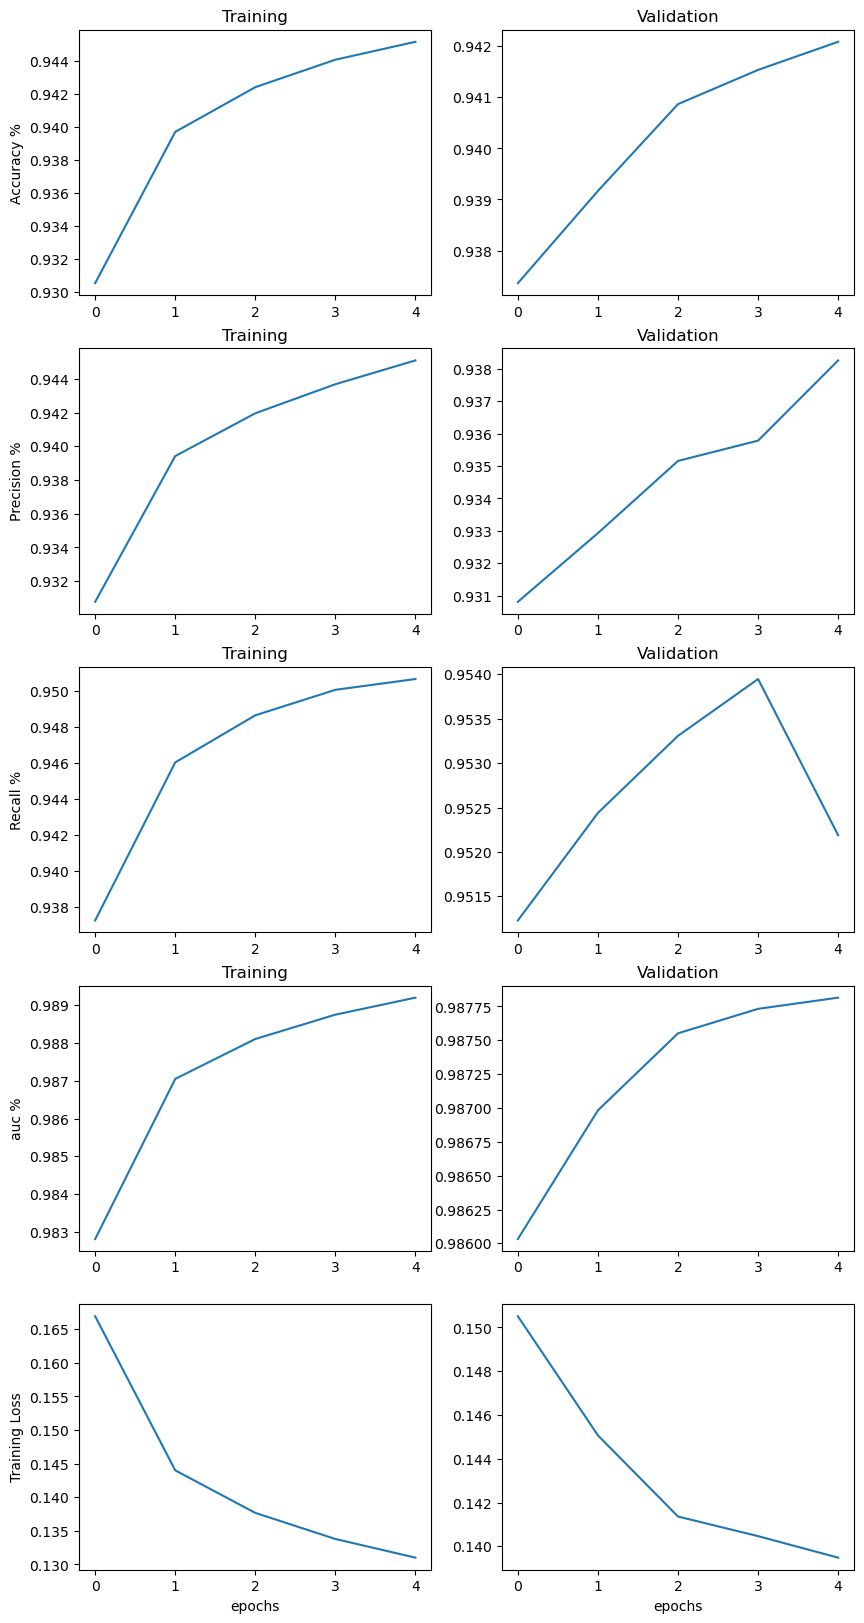

In [201]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,20))

plt.subplot(5,2,1)
plt.plot(history3.history['accuracy'])
plt.ylabel('Accuracy %')
plt.title('Training')

plt.subplot(5,2,2)
plt.plot(history3.history['val_accuracy'])
plt.title('Validation')


plt.subplot(5,2,3)
plt.plot(history3.history['Precision'])
plt.ylabel('Precision %')
plt.title('Training')

plt.subplot(5,2,4)
plt.plot(history3.history['val_Precision'])
plt.title('Validation')


plt.subplot(5,2,5)
plt.plot(history3.history['Recall'])
plt.ylabel('Recall %')
plt.title('Training')

plt.subplot(5,2,6)
plt.plot(history3.history['val_Recall'])
plt.title('Validation')


plt.subplot(5,2,7)
plt.plot(history3.history['auc'])
plt.ylabel('auc %')
plt.title('Training')

plt.subplot(5,2,8)
plt.plot(history3.history['val_auc'])
plt.title('Validation')


plt.subplot(5,2,9)
plt.plot(history3.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(5,2,10)
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')


#precision, recall, auc

### First model with three layers:

5222/5222 - 9s - 2ms/step - Precision: 0.9450 - Recall: 0.9502 - accuracy: 0.9449 - auc: 0.9890 - loss: 0.1321 - val_Precision: 0.9370 - val_Recall: 0.9530 - val_accuracy: 0.9418 - val_auc: 0.9876 - val_loss: 0.1410

### Second model with two layers:

5222/5222 - 12s - 2ms/step - Precision: 0.9445 - Recall: 0.9508 - accuracy: 0.9449 - auc: 0.9890 - loss: 0.1326 - val_Precision: 0.9396 - val_Recall: 0.9510 - val_accuracy: 0.9423 - val_auc: 0.9876 - val_loss: 0.1407


### Third model with four layers

5222/5222 - 8s - 2ms/step - Precision: 0.9451 - Recall: 0.9507 - accuracy: 0.9452 - auc: 0.9892 - loss: 0.1310 - val_Precision: 0.9383 - val_Recall: 0.9522 - val_accuracy: 0.9421 - val_auc: 0.9878 - val_loss: 0.1395



Based on this, using the auc parameter, the model with four deep layers performs the best with a evaluation area under the curve ROC of .9878 which is higher than the other two of 0.9876 and 0.9876, as well as better as far as precision, accuracy, and loss go. However, it surprisingly does slightly worse on recall, which in our business understanding was one of the most important things. If this is all you care about, then you should choose the first model with three layers.

In [202]:
from tensorflow.keras.utils import FeatureSpace

# Crossing columns together 
feature_space4 = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2),
    ],
    output_mode="concat",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels4 = ds_train.map(lambda x, _: x)
feature_space4.adapt(train_ds_with_no_labels3)

In [215]:
dict_inputs4 = feature_space4.get_inputs() # need to use unprocessed features here, to gain access to each output

#get rid of the wide part

# # we need to create separate lists for each branch
# crossed_outputs4 = []

# # for each crossed variable, make an embedding
# for col in feature_space4.crossers.keys():
    
#     x = setup_embedding_from_crossing(feature_space4, col)
    
#     # save these outputs in list to concatenate later
#     crossed_outputs4.append(x)
    

# # now concatenate the outputs and add a fully connected layer
# wide_branch4 = Concatenate(name='wide_concat4')(crossed_outputs4)

# reset this input branch
all_deep_branch_outputs4 = []

# for each numeric variable, just add it in after embedding
for idx,col in enumerate(numeric_headers):
    x = feature_space4.preprocessors[col].output
    x = CastToFloat()(x) # cast an integer as a float here
    all_deep_branch_outputs4.append(x)
    
# for each categorical variable
for col in categorical_headers:
    
    # get the output tensor from ebedding layer
    x = setup_embedding_from_categorical(feature_space4, col)
    
    # save these outputs in list to concatenate later
    all_deep_branch_outputs4.append(x)


# merge the deep branches together
deep_branch4 = Concatenate(name='embed_concat')(all_deep_branch_outputs4)
deep_branch4 = Dense(units=100,activation='relu', name='deep1')(deep_branch4)
deep_branch4 = Dense(units=50,activation='relu', name='deep2')(deep_branch4)
deep_branch4 = Dense(units=25,activation='relu', name='deep3')(deep_branch4)
deep_branch4 = Dense(units=10,activation='relu', name='deep4')(deep_branch4)
    
# merge the deep and wide branch
#we got rid of the wide part here
# final_branch4 = Concatenate(name='concat_deep_wide4')([deep_branch4, wide_branch4])
final_branch4 = Dense(units=1,activation='sigmoid',
                     name='combined')(deep_branch4)

training_model4 = keras.Model(inputs=dict_inputs4, outputs=final_branch4)
training_model4.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
)

training_model4.summary()



Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ make (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ model (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transmission        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interior            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ state (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ trim (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ condition           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ odometer            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ year (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ make[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ model[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ body[0][0]        │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ transmission[0][… │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ color[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ interior[0][0]    │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ state[0][0]       │
│ (StringLookup)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ string_categorical… │ (None, 1)         │          0 │ trim[0][0]        │
│ (StringLookup)      │                   │            │                 

 Total params: 72,257 (282.26 KB)

 Trainable params: 72,251 (282.23 KB)

 Non-trainable params: 6 (32.00 B)

In [216]:
# plot_model(
#     training_model4, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

In [226]:
history4 = training_model4.fit(
    ds_train, epochs=5, validation_data=ds_test, verbose=2
)

Epoch 1/5
5222/5222 - 11s - 2ms/step - Precision: 0.9459 - Recall: 0.9519 - accuracy: 0.9462 - auc: 0.9896 - loss: 0.1283 - val_Precision: 0.9371 - val_Recall: 0.9552 - val_accuracy: 0.9430 - val_auc: 0.9879 - val_loss: 0.1396
Epoch 2/5
5222/5222 - 9s - 2ms/step - Precision: 0.9464 - Recall: 0.9531 - accuracy: 0.9471 - auc: 0.9900 - loss: 0.1262 - val_Precision: 0.9369 - val_Recall: 0.9558 - val_accuracy: 0.9431 - val_auc: 0.9878 - val_loss: 0.1399
Epoch 3/5
5222/5222 - 11s - 2ms/step - Precision: 0.9472 - Recall: 0.9539 - accuracy: 0.9479 - auc: 0.9903 - loss: 0.1243 - val_Precision: 0.9385 - val_Recall: 0.9542 - val_accuracy: 0.9432 - val_auc: 0.9878 - val_loss: 0.1398
Epoch 4/5
5222/5222 - 9s - 2ms/step - Precision: 0.9478 - Recall: 0.9543 - accuracy: 0.9485 - auc: 0.9905 - loss: 0.1228 - val_Precision: 0.9381 - val_Recall: 0.9542 - val_accuracy: 0.9430 - val_auc: 0.9876 - val_loss: 0.1407
Epoch 5/5
5222/5222 - 9s - 2ms/step - Precision: 0.9487 - Recall: 0.9552 - accuracy: 0.9494 - 

Text(0.5, 0, 'epochs')

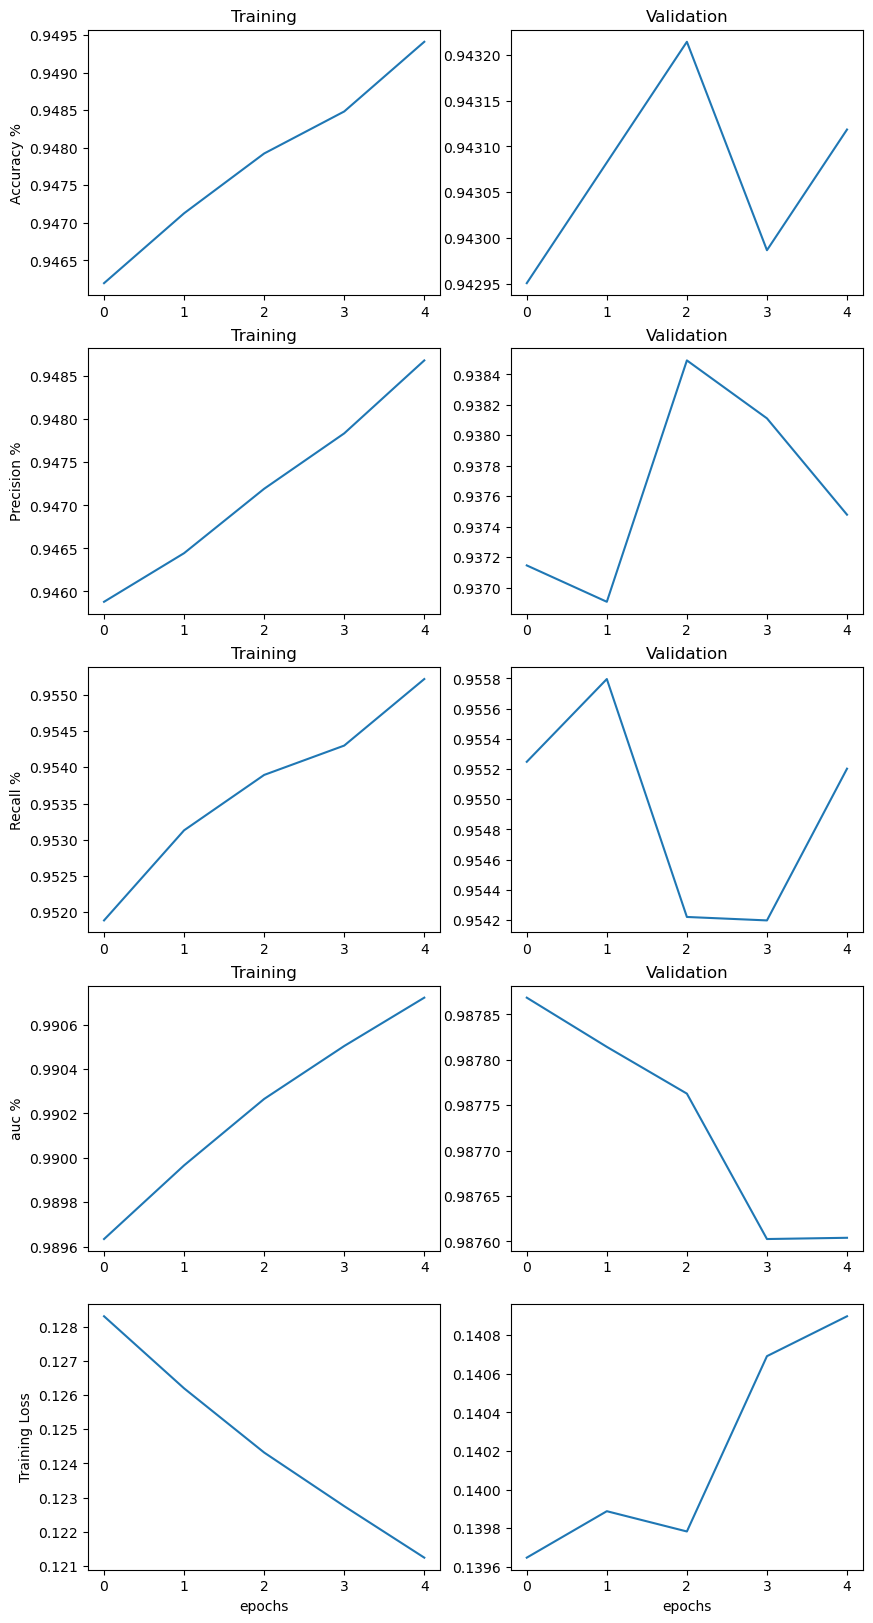

In [227]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,20))

plt.subplot(5,2,1)
plt.plot(history4.history['accuracy'])
plt.ylabel('Accuracy %')
plt.title('Training')

plt.subplot(5,2,2)
plt.plot(history4.history['val_accuracy'])
plt.title('Validation')


plt.subplot(5,2,3)
plt.plot(history4.history['Precision'])
plt.ylabel('Precision %')
plt.title('Training')

plt.subplot(5,2,4)
plt.plot(history4.history['val_Precision'])
plt.title('Validation')


plt.subplot(5,2,5)
plt.plot(history4.history['Recall'])
plt.ylabel('Recall %')
plt.title('Training')

plt.subplot(5,2,6)
plt.plot(history4.history['val_Recall'])
plt.title('Validation')


plt.subplot(5,2,7)
plt.plot(history4.history['auc'])
plt.ylabel('auc %')
plt.title('Training')

plt.subplot(5,2,8)
plt.plot(history4.history['val_auc'])
plt.title('Validation')


plt.subplot(5,2,9)
plt.plot(history4.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(5,2,10)
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')


#precision, recall, auc

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  

No wide network:

5222/5222 - 9s - 2ms/step - Precision: 0.9487 - Recall: 0.9552 - accuracy: 0.9494 - auc: 0.9907 - loss: 0.1212 - val_Precision: 0.9375 - val_Recall: 0.9552 - val_accuracy: 0.9431 - val_auc: 0.9876 - val_loss: 0.1409



With wide network:

5222/5222 - 8s - 2ms/step - Precision: 0.9451 - Recall: 0.9507 - accuracy: 0.9452 - auc: 0.9892 - loss: 0.1310 - val_Precision: 0.9383 - val_Recall: 0.9522 - val_accuracy: 0.9421 - val_auc: 0.9878 - val_loss: 0.1395

Based on these results, the model with the wide network is marginally better. It's area under the curve using ROC is .9878, which is more than without the wide network of .9876. This means that the wide part, which is designed to memorize specific feature interactions, does not play that much of a role in evaluating our data. This could be because we don't have a lot of meaningful categorical data, even though there is a lot of categorical data. It could mean that we didn't pre-process it enough beforehand, but based on what I see, it likely means that the names and other categorical data is less meaningful than the numerical data that we have.


## additional performance metrics

In [228]:
# we only need to do this to use sklearn metrics 
y_test = tf.concat([y for x, y in ds_test], axis=0)
y_test = y_test.numpy()
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [229]:
# Use the sklearn metrics here, if you want to
from sklearn import metrics as mt

# now lets see how well the model performed
yhat_proba = training_model.predict(ds_test) # sigmoid output probabilities
# use squeeze to get rid of any extra dimensions 
yhat = np.round(yhat_proba.squeeze()) # round to get binary class

print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

1306/1306 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[36938  2807]
 [ 2059 41738]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     39745
           1       0.94      0.95      0.94     43797

    accuracy                           0.94     83542
   macro avg       0.94      0.94      0.94     83542
weighted avg       0.94      0.94      0.94     83542



## speeding up

In [230]:
# Crossing columns together 
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "make": FeatureSpace.string_categorical(num_oov_indices=0),
        "model": FeatureSpace.string_categorical(num_oov_indices=50),
        "body": FeatureSpace.string_categorical(num_oov_indices=0),
        "transmission": FeatureSpace.string_categorical(num_oov_indices=0),
        "color": FeatureSpace.string_categorical(num_oov_indices=0),
        "interior": FeatureSpace.string_categorical(num_oov_indices=0),
        "state": FeatureSpace.string_categorical(num_oov_indices=0),
        "condition": FeatureSpace.string_categorical(num_oov_indices=0),
        "trim": FeatureSpace.string_categorical(num_oov_indices=50),

        # Numerical features to make discrete, make into integer with max val
        #"age": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "odometer": FeatureSpace.float_normalized(),
        "year": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(
            feature_names=('condition','make'), # dims: 7 x 14 = 
            crossing_dim=5*49, output_mode='int'),
        FeatureSpace.cross(
            feature_names=('body','transmission',), # 7 x 2 x 5
            crossing_dim=8*2, output_mode='int'),
        FeatureSpace.cross(
            feature_names=('interior','color'), # 14 x 16
            crossing_dim=17*20, output_mode='int'),
    ],
    output_mode="dict",
)
# make has 49 unique values.
# model has 604 unique values.
# body has 8 unique values.
# transmission has 2 unique values.
# color has 20 unique values.
# interior has 17 unique values.
# state has 34 unique values.
# trim has 1124 unique values.
# condition has 5 unique values.

# add explanation of this pre-processing here
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)


preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [231]:
# def setup_embedding_from_encoding(encoded_features, col_name):
#     # what the maximum integer value for this variable?
    
#     # get the size of the feature
#     x = encoded_features[col_name]
#     N = x.shape[1]
    
    
#     # now use an embedding to deal with integers as if they were one hot encoded
#     x = Embedding(input_dim=N, 
#                   output_dim=int(np.sqrt(N)), 
#                   name=col_name+'_embed')(x)
    
    
#     x = Flatten()(x) # get rid of that pesky extra dimension (for time of embedding)
    
#     return x


# dict_inputs = feature_space.get_inputs() # need to use unprocessed features here, to gain access to each output
# encoded_features = feature_space.get_encoded_features() # these features have been encoded

# # we need to create separate lists for each branch
# crossed_outputs = []

# # for each crossed variable, make an embedding
# for col in feature_space.crossers.keys():
    
#     x = setup_embedding_from_encoding(encoded_features, col)
    
#     # save these outputs in list to concatenate later
#     crossed_outputs.append(x)
    

# # now concatenate the outputs and add a fully connected layer
# wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# # reset this input branch
# all_deep_branch_outputs = []

# # for each numeric variable, just add it in after embedding
# for col in numeric_headers:
#     x = encoded_features[col]
#     #x = tf.cast(x,float) # cast an integer as a float here
#     all_deep_branch_outputs.append(x)
    
# # for each categorical variable
# for col in categorical_headers:
    
#     # get the output tensor from ebedding layer
#     x = setup_embedding_from_encoding(encoded_features, col)
    
#     # save these outputs in list to concatenate later
#     all_deep_branch_outputs.append(x)


# # merge the deep branches together
# deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
# deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
# deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
# deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# # merge the deep and wide branch
# final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
# final_branch = Dense(units=1,activation='sigmoid',
#                      name='combined')(final_branch)

# # encoded features input, fast
# training_model = keras.Model(inputs=encoded_features, outputs=final_branch)
# training_model.compile(
#     optimizer="adam", loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')]
# )

# training_model.summary()

# # non-encoded, perform redundant operations
# inference_model = keras.Model(inputs=dict_inputs, outputs=final_branch)
# inference_model.compile(loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall", AUC(name='auc')])

In [232]:
# plot_model(
#     training_model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='LR', expand_nested=False, dpi=96
# )

In [233]:
# history = training_model.fit(
#     preprocessed_ds_train, epochs=1, validation_data=preprocessed_ds_test, verbose=2
# )

### Modeling (5 points total)
- [2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.
Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.

- [2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.

- [1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  


### Exceptional Work (1 points total)
5000 students: You have free reign to provide additional analyses.
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.

(50, 25)


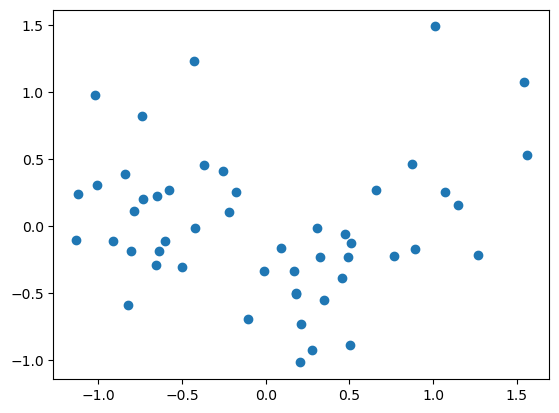

In [234]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'model' is your trained Keras model and 'embedding_layer_name' is the name of your embedding layer
embedding_layer = training_model.get_layer(name="deep2")
embedding_weights = embedding_layer.get_weights()[0]

print(embedding_weights.shape)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
embedding_weights_pca = pca.fit_transform(embedding_weights)

# Visualize the results
plt.scatter(embedding_weights_pca[:, 0], embedding_weights_pca[:, 1])
plt.show()

Here is our dimensionality reduction of our embeddings. We notice that although there aren't many tight clusters, some of the features appear to be close together. This helps the model know that these data are similar in some way, which helps it later predict based on these clusters.